### Analysis: Will the Customer Accept the Coupon for Cheaper Restaurants (aka Fast Food)?


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Independent Investigation

Let's use coupon group ***Cheaper Restaurants or Fast Food Restaurants*** group for our analysis.

In [3]:
# First create data frame for only those people where the chear restaurant, i.e. fast food places, coupons were offered.
data = pd.read_csv('data/coupons.csv')

# Drop car column - there is not much usable data available in that column
data.drop(columns='car', inplace=True)

# Create new dataframe where customers were offered cheaper restaurant 
# (known as fast food restaurant for this analysis going forward)
ff_coupons = data.query('coupon == "Restaurant(<20)"')

print(ff_coupons.shape)
print(ff_coupons.info())

(2786, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   object
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   object
 13  income                2786 non-null   object
 14  Bar                   2763 non-null   object
 15  CoffeeHouse           2739 non-

In [4]:
# let's convert some of the columns to numeric and add them as new column

#1 age
# current values: 21, 46, 26, 31, 41, 50plus, 36, below21 
# New Numeric Values: below21 -> 20, 21-25 -> 21, 26-30 -> 26, 31-35 -> 31
#                                36-40 -> 36, 41-45 -> 41, 46-50 -> 46, 50plus -> 51

def modify_age_value(x):
    if x == 'below21':
        return int(20)
    elif x == '50plus':
        return int(51)
    else:   
        return int(x)

ff_coupons.loc[:,'age_num'] = ff_coupons['age'].apply(modify_age_value)

print(ff_coupons['age_num'].describe())


count    2786.000000
mean       32.468772
std        10.422455
min        20.000000
25%        22.250000
50%        31.000000
75%        41.000000
max        51.000000
Name: age_num, dtype: float64


/var/folders/m8/xwy7k01n4rsbswwncxhbmrh00000gn/T/ipykernel_70443/4022330687.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_coupons.loc[:,'age_num'] = ff_coupons['age'].apply(modify_age_value)


In [5]:
#2 Income
# current values: income: $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $37500 - $49999, 
#                         $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500, 

# New Numeric Values: below21 -> 20, 21-25 -> 21, 26-30 -> 26, 31-35 -> 31
#                                36-40 -> 36, 41-45 -> 41, 46-50 -> 46, 50plus -> 51
import re

# Regular expression to find and extract first group of numbers
patt = r"^.[^\d]*(\d+)\s*"

def modify_income_value(value:str):

    if value == "Less than $12500":
        return int(12499)

    match = re.match(patt,value)
    if match:
        return int(match.group(1))


ff_coupons.loc[:, 'income_num'] = ff_coupons['income'].apply(modify_income_value)

print(ff_coupons['income_num'].describe())

count      2786.000000
mean      47761.043790
std       30508.233232
min       12499.000000
25%       25000.000000
50%       37500.000000
75%       75000.000000
max      100000.000000
Name: income_num, dtype: float64


/var/folders/m8/xwy7k01n4rsbswwncxhbmrh00000gn/T/ipykernel_70443/3391521303.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_coupons.loc[:, 'income_num'] = ff_coupons['income'].apply(modify_income_value)


In [6]:
#3 Y
#  Y: 1 -> "Accepted", 0-> "Rejected"

ff_coupons.loc[:, 'Y_str'] = ff_coupons['Y'].map({0:"Rejected", 1:"Accepted"})

ff_coupons['Y_str'].unique()

/var/folders/m8/xwy7k01n4rsbswwncxhbmrh00000gn/T/ipykernel_70443/2282348664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_coupons.loc[:, 'Y_str'] = ff_coupons['Y'].map({0:"Rejected", 1:"Accepted"})


array(['Accepted', 'Rejected'], dtype=object)

In [7]:
# Print all the unique values for each column.

for col in ff_coupons.columns:
#for col in ['destination']:
    rowinfo:list[str] = []

    for value in sorted(ff_coupons.query(f"not {col}.isnull()")[col].unique()):
#        print(f"value: {value}")
        rowinfo.append(f"{value} ")

#    print(f"rowinfo: {rowinfo}")
    rowinfo_str= f"{col.capitalize()}: {', '.join(rowinfo)}"
    print(rowinfo_str)

Destination: Home , No Urgent Place , Work 
Passanger: Alone , Friend(s) , Kid(s) , Partner 
Weather: Rainy , Snowy , Sunny 
Temperature: 30 , 55 , 80 
Time: 10AM , 10PM , 2PM , 6PM , 7AM 
Coupon: Restaurant(<20) 
Expiration: 1d , 2h 
Gender: Female , Male 
Age: 21 , 26 , 31 , 36 , 41 , 46 , 50plus , below21 
Maritalstatus: Divorced , Married partner , Single , Unmarried partner , Widowed 
Has_children: 0 , 1 
Education: Associates degree , Bachelors degree , Graduate degree (Masters or Doctorate) , High School Graduate , Some High School , Some college - no degree 
Occupation: Architecture & Engineering , Arts Design Entertainment Sports & Media , Building & Grounds Cleaning & Maintenance , Business & Financial , Community & Social Services , Computer & Mathematical , Construction & Extraction , Education&Training&Library , Farming Fishing & Forestry , Food Preparation & Serving Related , Healthcare Practitioners & Technical , Healthcare Support , Installation Maintenance & Repair , L

#### 1. Let's find acceptance rate for drivers based on their cheaper restaurant preference.

In [12]:
# Let's perform univariate analysis for RestaurantLessThan20 column
fig1_df = ff_coupons.groupby(['RestaurantLessThan20', 'Y_str'])[['Y']].count().rename(columns= {'Y': 'count'})

# We will create %val colunm for annotation
fig1_df['percent_val'] =  ((fig1_df / fig1_df.groupby(['RestaurantLessThan20'])[['count']].sum()) * 100).round(0).astype(int).astype(str) + '%'

# Reset index and sort values in decending order by count
fig1_df = fig1_df.reset_index().sort_values(by='count', ascending=False)

fig1 = px.bar(fig1_df, x="RestaurantLessThan20", y="count", color="Y_str", 
             text="percent_val", title="Coupon acceptance by Fast Food Preference")

fig1.show()

# Save figure in images directory
fig1.write_image('images/FF_coupon_acceptance_By_FF_Preference.png')



Acceptance rate is higher for fast food coupons. Drivers who normally don't go to fast food places also accepted more than 50% of time. 

#### 2. Univariate analysis by the age of driver.

In [11]:
fig2_df = ff_coupons.groupby(['age', 'Y_str'])[['Y']].count().rename(columns= {'Y': 'count'})

# We will create %val colunm for annotation
fig2_df['percent_val'] =  ((fig2_df / fig2_df.groupby(['age'])[['count']].sum()) * 100).round(0).astype(int).astype(str) + '%'

# Reset index and sort values in decending order by count
fig2_df = fig2_df.reset_index().sort_values(by='count', ascending=False)

fig2 = px.bar(fig2_df, x="age", y="count", color="Y_str", 
             text="percent_val", title="Coupon acceptance by Driver's age group")

fig2.show()

# Save figure in images directory
fig2.write_image('images/FF_coupon_acceptance_by_Driver_Age.png')

Acceptance rate is higher for younger drivers i.e. below Age of 35. 35 and above the acceptance rate is lower but still above 50%

#### 3. Let's check the rate of acceptance when drivers are relatively young (age 30 and below) for all income brackets 

In [10]:
# age_num: 20, 21, 26, 31, 36, 41, 46, 51, 
# income_num: 12499, 12500, 25000, 37500, 50000, 62500, 75000, 87500, 100000, 
# Y_str: Accepted, Rejected,

age_lte_30 = 'age_num <= 30'

fig3_df = ff_coupons.query(age_lte_30).groupby(['income', 'Y_str'])[['Y']].count().rename(columns= {'Y': 'count'})

# We will create %val colunm for annotation
fig3_df['percent_val'] =  ((fig3_df / fig3_df.groupby(['income'])[['count']].sum()) * 100).round(0).astype(int).astype(str) + '%'

# Reset index 
fig3_df = fig3_df.reset_index().sort_values(by='count', ascending=False)

fig3 = px.bar(fig3_df, x="income", y="count", color="Y_str", 
             text="percent_val", title="Coupon acceptance by Income level for Age <= 30")

fig3.show()

# Save figure in images directory
fig3.write_image('images/FF_coupon_acceptance_by_IncomeLevel.png')

Drivers with lower income accepts fast food coupon at a higher rate compared to high income drivers.

#### 4. Let's check the rate of acceptance by various parameters such as driving direction, time of the day, and coupon expiry timings.

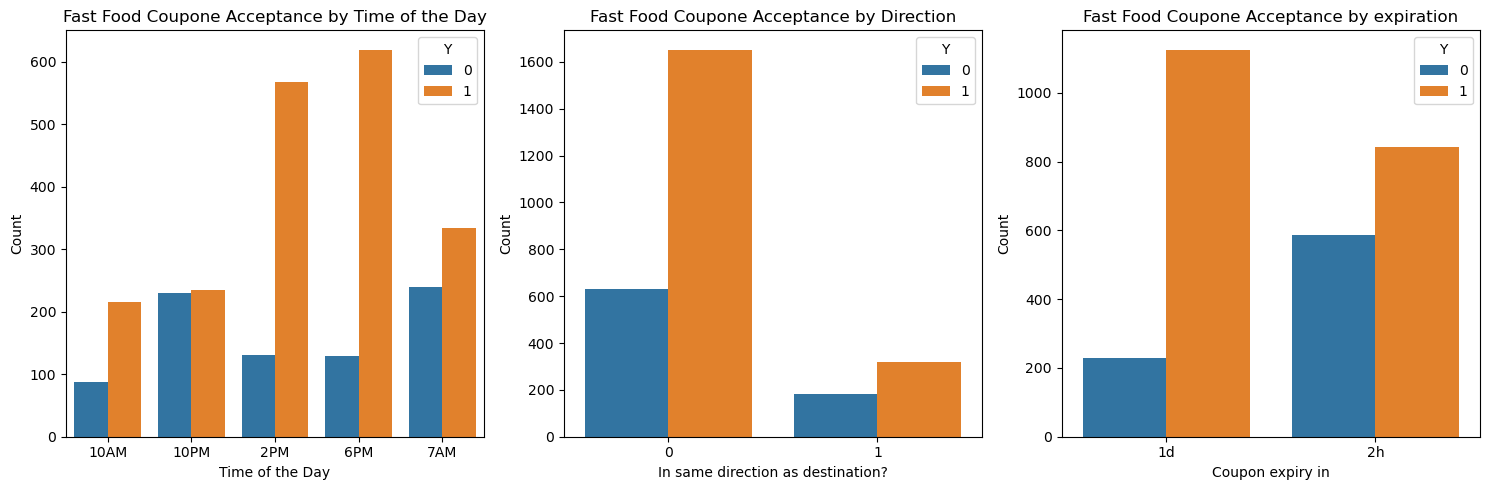

In [31]:
# direction_same: 0, 1, 
# time: 10AM, 10PM, 2PM, 6PM, 7AM, 
# coupon: Restaurant(<20), 
# expiration: 1d, 2h, 

# Create subplots
fig4, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False) # 1 row, 3 columns

# Create three barplot by three different values
## First by the time of the day
sns.barplot(data=ff_coupons.groupby(['time', 'Y']).aggregate('count')['destination'].reset_index(name='count'), 
            x='time', 
            y='count',
            hue='Y',
            ax=axes[0])
axes[0].set_title(f'Fast Food Coupone Acceptance by Time of the Day')
axes[0].set_xlabel('Time of the Day')
axes[0].set_ylabel('Count')

## Second by the Direction
sns.barplot(data=ff_coupons.groupby(['direction_same', 'Y']).aggregate('count')['destination'].reset_index(name='count'), 
            x='direction_same', 
            y='count',
            hue='Y',
            ax=axes[1])
axes[1].set_title(f'Fast Food Coupone Acceptance by Direction')
axes[1].set_xlabel('In same direction as destination?')
axes[1].set_ylabel('Count')

## Third by the Coupon expirty timing
sns.barplot(data=ff_coupons.groupby(['expiration', 'Y']).aggregate('count')['destination'].reset_index(name='count'), 
            x='expiration', 
            y='count',
            hue='Y',
            ax=axes[2])
axes[2].set_title(f'Fast Food Coupone Acceptance by expiration')
axes[2].set_xlabel('Coupon expiry in')
axes[2].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
fig4.savefig('images/fig4.png')